In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/lion/Super-Project/dataset/lotto - data.csv')
df

,회차,추첨일,당첨번호1,당첨번호2,당첨번호3,당첨번호4,당첨번호5,당첨번호6,보너스
0,968,2021.06.19,2,5,12,14,24,39,33
1,967,2021.06.12,1,6,13,37,38,40,9
2,966,2021.06.05,1,21,25,29,34,37,36
3,965,2021.05.29,2,13,25,28,29,36,34
4,964,2021.05.22,6,21,36,38,39,43,30
...,...,...,...,...,...,...,...,...,...
963,5,2003.01.04,16,24,29,40,41,42,3
964,4,2002.12.28,14,27,30,31,40,42,2
965,3,2002.12.21,11,16,19,21,27,31,30
966,2,2002.12.14,9,13,21,25,32,42,2


In [3]:
# 날짜 처리
df['new_date'] = pd.to_datetime(df['추첨일'])
df['lotto_years'] = df['new_date'].dt.year
df['lotto_months'] = df['new_date'].dt.month
df['lotto_days'] = df['new_date'].dt.day

print( "기존 데이터 프레임 : {} ".format(df) )

del df['추첨일'], df['new_date']

df

기존 데이터 프레임 :       회차         추첨일  당첨번호1  ...  lotto_years  lotto_months  lotto_days
0    968  2021.06.19      2  ...         2021             6          19
1    967  2021.06.12      1  ...         2021             6          12
2    966  2021.06.05      1  ...         2021             6           5
3    965  2021.05.29      2  ...         2021             5          29
4    964  2021.05.22      6  ...         2021             5          22
..   ...         ...    ...  ...          ...           ...         ...
963    5  2003.01.04     16  ...         2003             1           4
964    4  2002.12.28     14  ...         2002            12          28
965    3  2002.12.21     11  ...         2002            12          21
966    2  2002.12.14      9  ...         2002            12          14
967    1  2002.12.07     10  ...         2002            12           7

[968 rows x 13 columns] 


,회차,당첨번호1,당첨번호2,당첨번호3,당첨번호4,당첨번호5,당첨번호6,보너스,lotto_years,lotto_months,lotto_days
0,968,2,5,12,14,24,39,33,2021,6,19
1,967,1,6,13,37,38,40,9,2021,6,12
2,966,1,21,25,29,34,37,36,2021,6,5
3,965,2,13,25,28,29,36,34,2021,5,29
4,964,6,21,36,38,39,43,30,2021,5,22
...,...,...,...,...,...,...,...,...,...,...,...
963,5,16,24,29,40,41,42,3,2003,1,4
964,4,14,27,30,31,40,42,2,2002,12,28
965,3,11,16,19,21,27,31,30,2002,12,21
966,2,9,13,21,25,32,42,2,2002,12,14


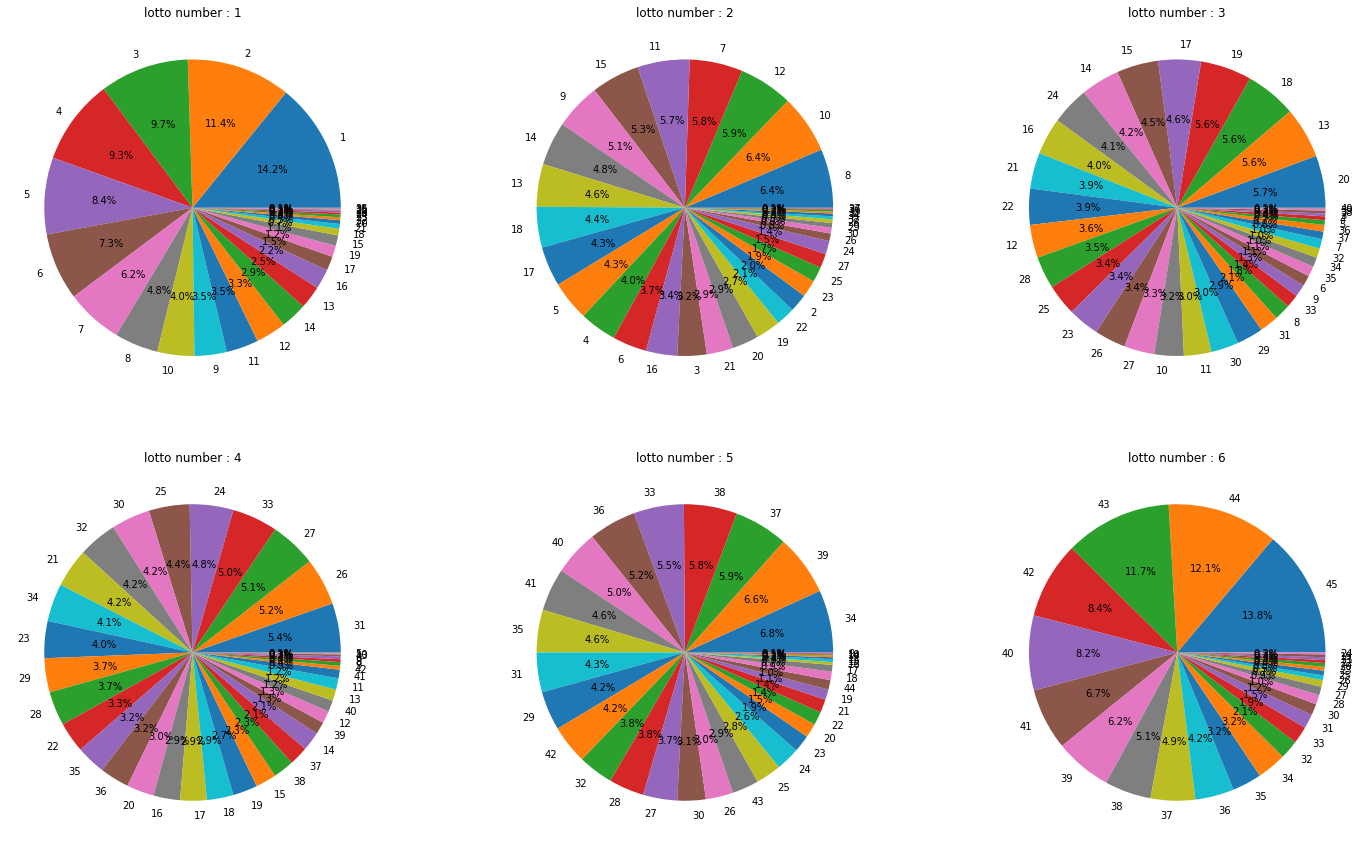

In [4]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(25, 15)

for i in range( 6 ) :
  eval(
      "ax{}.pie( df['당첨번호{}'].value_counts().values, labels = df['당첨번호{}'].value_counts().index, autopct='%0.1f%%' )".format(i+1, i+1, i+1)
  )
  eval(
      "ax{}.set_title('lotto number : {}')".format(i+1, i+1)
  )

plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def Super_Lotto(lists) :
  x = df[["회차", "lotto_years", "lotto_months", "lotto_days"]]
  columns = ["당첨번호1", "당첨번호2", "당첨번호3", "당첨번호4", "당첨번호5", "당첨번호6", "보너스"]
  lv_list = []

  for i in range( 7 ) :
    if "보너스" in columns[i] : 
      y = df[[ "보너스" ]]  
    else :
      y = df[[ "{}".format(columns[i+1]) ]]

    train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.7, shuffle = True)

    clf = SVC()

    clf.fit(train_x, train_y)

    pred_y = clf.predict(test_x)
    print( "정답률 = {} %".format( round(accuracy_score(test_y, pred_y)*100, 2)) )

    # import numpy as np
    # print( "당첨번호 {} 번째, 예측값은 {}.".format(i+1, clf.predict( np.array(lists).reshape(1, -1))[0] ) )

    lv_list.append( clf.predict( np.array(lists).reshape(1, -1))[0] )
  
  return lv_list

print("complete")

complete


In [6]:
lotto_lists = Super_Lotto([969, 2021, 6, 19])


while True :
  if len(np.unique(lotto_lists)) != 7 :
    lotto_lists = Super_Lotto([969, 2021, 6, 19])
    continue
  else :
    print("로또번호 생성 완료!", lotto_lists)
    break
print("------------------------------------------------")

정답률 = 5.15 %
정답률 = 4.81 %
정답률 = 3.44 %
정답률 = 3.78 %
정답률 = 14.09 %
정답률 = 2.06 %
정답률 = 3.44 %
정답률 = 6.19 %
정답률 = 3.78 %
정답률 = 5.15 %
정답률 = 4.81 %
정답률 = 11.34 %
정답률 = 4.12 %
정답률 = 2.41 %
로또번호 생성 완료! [10, 18, 31, 39, 45, 43, 30]
------------------------------------------------


In [7]:
gwangju_df = pd.read_csv('/content/drive/My Drive/lion/Super-Project/dataset/광주여행지 분류하기 - gwangju.csv')
gwangju_df

,놀거리평점,볼거리평점,먹거리평점,살거리평점,추천 여행지
0,5.1,3.5,1.4,0.2,펭귄마을
1,4.9,3.0,1.4,0.2,펭귄마을
2,4.7,3.2,1.3,0.2,펭귄마을
3,4.6,3.1,1.5,0.2,펭귄마을
4,5.0,3.6,1.4,0.2,펭귄마을
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,무등산
146,6.3,2.5,5.0,1.9,무등산
147,6.5,3.0,5.2,2.0,무등산
148,6.2,3.4,5.4,2.3,무등산


In [8]:
# 런타임 다시 시작
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

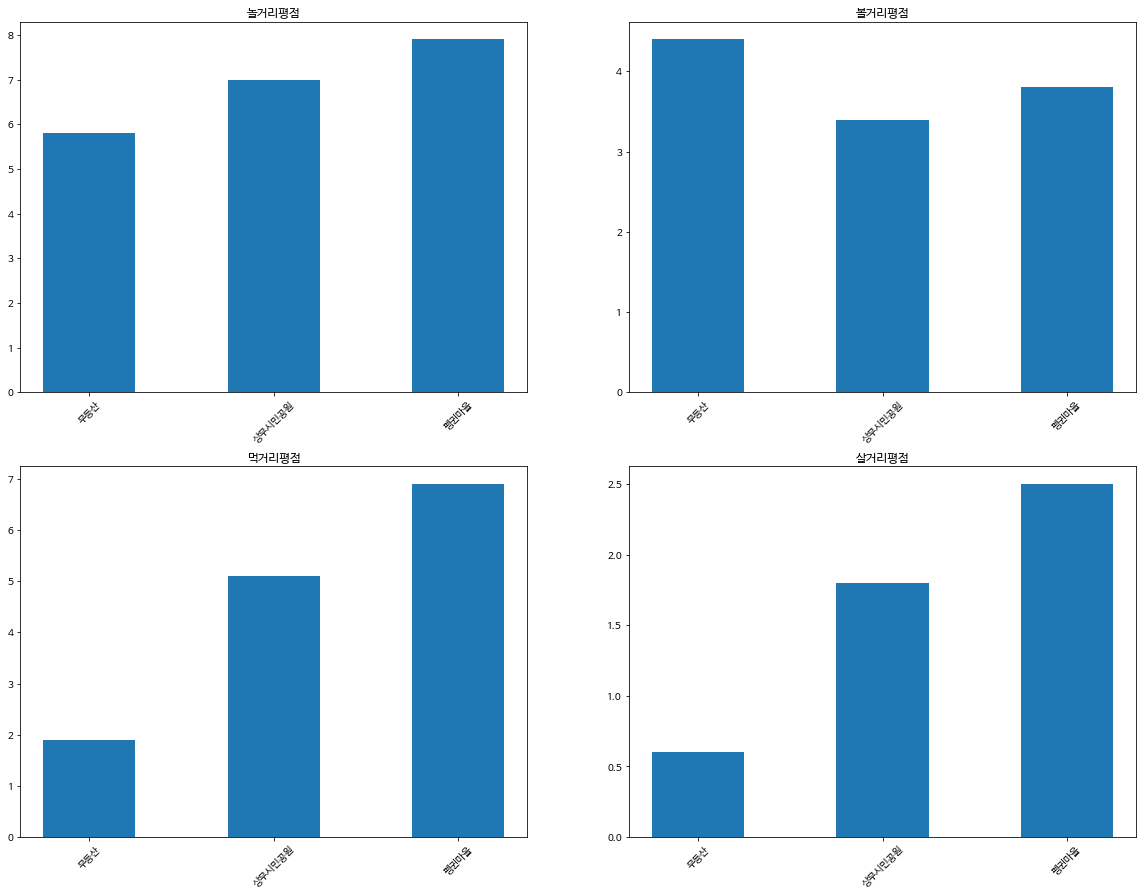

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20, 15)

# ax{}.bar( gwangju_df[gwangju_df.columns.tolist()[{}]], gwangju_df[gwangju_df.columns.tolist()[-1]], width=0.6 )
# ax{}.set_title(gwangju_df.columns.tolist()[{}])

# ax1.bar( gwangju_df['여행지'], gwangju_df['놀거리평점'], width=0.7 )
# ax1.set_xticklabels(np.unique(gwangju_df["여행지"]), rotation=45 )
# ax1.set_title('놀거리 평점')

for i in range( 4 ) :
  eval(
      "ax{}.bar( gwangju_df[gwangju_df.columns.tolist()[-1]], gwangju_df[gwangju_df.columns.tolist()[{}]], width=0.5 )".format(i+1, i)
  )

  eval(
    "ax{}.set_xticklabels(np.unique(gwangju_df['추천 여행지']), rotation=45 )".format(i+1)
  )

  eval(
    "ax{}.set_title(gwangju_df.columns.tolist()[{}])".format(i+1, i)
  )

plt.show()

In [10]:
# from sklearn.ensemble import RandomForestClassifier

x = gwangju_df[["놀거리평점",	"먹거리평점",	"볼거리평점",	"살거리평점"]]
y = gwangju_df[["추천 여행지"]]

train_x, test_x, train_y, test_y = train_test_split(x, y, train_size = 0.7, shuffle = True)

clf = SVC()

clf.fit(train_x, train_y)

pred_y = clf.predict(test_x)
print( "정답률 = {} %".format( round(accuracy_score(test_y, pred_y)*100, 2)) )


정답률 = 91.11 %


In [11]:
input_x = [ [[3.3, 5, 5, 1]], [[5, 3, 2, 5]] ]

print( "나호용님이 원하는 항목에 따른 광주 여행지 분류 추천: {}".format( clf.predict(input_x[0])[0] ) )
print( "김소연님이 원하는 항목에 따른 광주 여행지 분류 추천 : {}".format( clf.predict(input_x[1])[0] ) )

나호용님이 원하는 항목에 따른 광주 여행지 분류 추천: 상무시민공원
김소연님이 원하는 항목에 따른 광주 여행지 분류 추천 : 무등산


In [12]:
import numpy as np

a = np.array(['a', 'a', 'b', 'c', 'd'])
unique, counts = np.unique(a, return_counts=True)
unique

counts

array([2, 1, 1, 1])